In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mrmr
from pymrmr import mRMR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from mrmr import mrmr_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import os.path
import json
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
import pymrmr
from scipy.stats import kruskal, mannwhitneyu
from boruta import BorutaPy

# Import data

In [2]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,49201,98691,49035,148591,5095,3263,3566,133,41683,2231,...,0,0,52,0,4,8,383,547,1503,80378
TCGA-3C-AALK,57278,114320,57540,164553,18464,2114,8364,113,40723,2245,...,0,0,22,0,22,11,459,263,6620,152218
TCGA-4H-AAAK,67196,134563,67607,136918,20429,2162,10556,139,50848,2056,...,0,0,13,0,7,5,123,212,6666,158568
TCGA-5L-AAT1,94243,188921,94346,211457,21076,2657,12104,272,94610,3903,...,0,0,23,0,12,11,235,529,5352,196557
TCGA-5T-A9QA,49313,97721,49623,127544,2134,1769,8190,104,28306,2792,...,0,0,72,0,3,23,186,146,445,127728


In [4]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AALI,436.55,0,0,130.32,8,13924.87,290,1,0,1633,...,110,825,2470,365,1110,10123,2425,748,1704,0
TCGA-3C-AALK,461.69,0,0,151.08,4,26490.85,1224,0,0,1878,...,133,1058,2088,424,1468,13756,1888,1694,161,0
TCGA-4H-AAAK,631.87,1,9,362.77,8,22525.79,804,1,1,1925,...,115,997,2467,33,1823,9498,1955,2072,440,0
TCGA-5L-AAT1,259.26,0,0,125.12,5,18903.93,323,1,0,971,...,55,697,1213,66,630,5421,1732,698,71,0
TCGA-5T-A9QA,600.72,1,1,446.68,0,6084.91,787,7,0,1670,...,55,547,1548,4,615,6160,2132,843,7,0


In [5]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,-0.000752,0.022553,0.021112,0.101796,-0.382850,-0.108997,0.103860,-0.335720,0.139450,0.148123,...,-0.076626,-0.231296,-0.169884,0.040360,-0.043975,1.293687,0.783984,0.162565,-0.667649,-0.102581
TCGA-3C-AALK,-0.202252,0.077041,0.153997,0.299107,-0.438903,-0.460678,-0.358195,0.474016,0.376476,-0.160318,...,-0.219547,-0.340080,0.208381,0.365363,-0.136875,0.680809,0.612644,-0.131174,0.419210,-0.118623
TCGA-4H-AAAK,-0.208434,0.062566,0.034209,0.429696,-0.102852,-0.499466,-0.433138,0.143794,0.339525,-0.221161,...,-0.070647,-0.471717,-0.052702,0.068514,-0.080364,0.300677,0.819253,-0.520017,0.003252,-0.855659
TCGA-5L-AAT1,-0.465476,0.141845,0.232721,0.427772,-0.231596,0.276124,-0.411702,0.736283,0.398665,-0.063979,...,-0.145362,-0.582255,0.346637,0.289421,-0.225658,0.591818,0.623455,-0.559783,0.510494,-0.601296
TCGA-5T-A9QA,-0.354823,0.156575,0.249023,1.197526,0.447913,1.001215,0.307314,0.581762,0.316779,-0.085146,...,0.076588,-0.325001,0.166015,-1.064492,0.181296,-0.226434,0.842169,0.280629,0.524148,-0.500144


# Import label

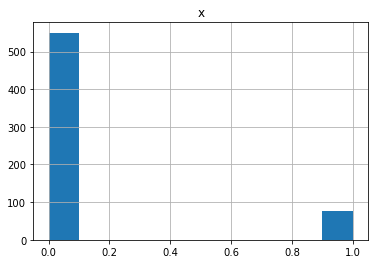

In [6]:
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

# Check NaN values

In [7]:
def checkNaNValues(dataset):
    if dataset.isna().sum().sum() == 0:
        print(f"Non sono presenti dati NaN")
    else:
        for column in dataset:
            if dataset[column].isna().sum() == 0:
                print(f"Nella colonna {column} non sono presenti dati NaN")
            else:
                print(f"Nella colonna {column} sono presenti: {dataset[column].isna().sum()}")

In [8]:
checkNaNValues(cnv)

Non sono presenti dati NaN


In [9]:
checkNaNValues(mRNA)

Non sono presenti dati NaN


In [10]:
checkNaNValues(miRNA)

Non sono presenti dati NaN


In [11]:
checkNaNValues(proteins)

Non sono presenti dati NaN


# Normalize data

In [12]:
def dataNormalization(scaler, data):
    scl = scaler()
    model = scl.fit(data)
    scaled_data = model.transform(data)
    
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Filter feature with low variability

In [13]:
def filter_features_with_low_variability(data, alfa) -> pd.DataFrame:
    #Delete columns with standard deviation < alfa (0.10?)
    for column in data:
        if data[column].std() < alfa:
            #print(f'column: {column} has standard deviation < {alfa}, removed')
            data.drop(column, axis=1, inplace=True)
            
    return data

# Normalize and filter datasets

In [16]:
dataset_dict = {'cnv': cnv, 'miRNA': miRNA, 'mRNA': mRNA, 'proteins': proteins}

In [19]:
def create_data_normalized_filtered(data_dict, scaler, min_variance):
    dict_filtered_nornalize = {}
    for (key, value) in zip(data_dict, data_dict.values()):
        dict_filtered_nornalize[key] = filter_features_with_low_variability(dataNormalization(MinMaxScaler, value), 0.05)
    
    return dict_filtered_nornalize

In [20]:
filtered_normalize_data = create_data_normalized_filtered(dataset_dict, MinMaxScaler, 0.05)

In [21]:
#TO DO: su ogni dataset, genero i vari holdout e sui dati di training faccio
#feature selection e traino usando RandomForest
#usando 10 multiple holdout 
#misura di performance AUPRC, auc interne e poi media fuori 

#Feature seletion using multivariate (mrmr, maximum relevant minimum redundancy e boruta)
#mrmr piu' e' basso piu' la feature non ci interessa, piu' e' alto piu e' informativa

In [22]:
#UMAP 

In [23]:
#baseline AUPRC
len(label)/label[label['x'] == 1].count()/100

x    0.081429
dtype: float64

# Univariate feature selection using Kruskal-Wallis e Mann-Whitney

In [24]:
def create_dataframe_pos_neg(dataset, label):
    return (dataset[label['x']==1], dataset[label['x']==0])

In [25]:
def univariate_features_selection(dataset, label, univariate_tecnique, min_pValue):
    pos, neg = create_dataframe_pos_neg(dataset, label)
    H, pval = univariate_tecnique(pos, neg)
    mask = (pval < min_pValue)
    return dataset.columns[mask]

In [26]:
univariate_features_selection(filtered_normalize_data['proteins'], label, mannwhitneyu, 0.05)

Index(['A-Raf', 'Akt_pS473', 'Bcl-2', 'FASN', 'GSK3_pS9', 'Jak2', 'Ku80',
       'PRAS40_pT246', 'PREX1', 'Raptor', 'Shc_pY317', 'XRCC1', 'mTOR', 'p27',
       'p38_pT180_Y182'],
      dtype='object')

In [27]:
univariate_features_selection(filtered_normalize_data['proteins'], label, kruskal, 0.05)

Index(['A-Raf', 'Akt_pS473', 'Bcl-2', 'FASN', 'GSK3_pS9', 'Jak2', 'Ku80',
       'PRAS40_pT246', 'PREX1', 'Raptor', 'Shc_pY317', 'XRCC1', 'mTOR', 'p27',
       'p38_pT180_Y182'],
      dtype='object')

# Multivariate feature selection, mrmr and Boruta

In [29]:
def dataset_mrmr(dataset, n_feature):
    return dataset[mRMR(dataset, 'MIQ', n_feature)]

dataset_mrmr(filtered_normalize_data['proteins'], 50)

,PKC-pan_BetaII_pS660,PKC-delta_pS664,PRDX1,PRAS40_pT246,PR,Paxillin,Rab11,PKC-alpha,PI3K-p85,PEA15_pS116,...,IRF-1,cIAP,mTOR,eIF4G,p16_INK4a,c-Kit,mTOR_pS2448,c-Abl,p62-LCK-ligand,p90RSK
TCGA-3C-AALI,0.515140,0.732106,0.391717,0.617066,0.256991,0.926132,0.174880,0.169500,0.516393,0.205165,...,0.613319,0.604198,0.492546,0.752241,0.637904,0.225889,0.532247,0.508302,0.692510,0.231455
TCGA-3C-AALK,0.691956,0.697933,0.360341,0.495525,0.277583,0.721347,0.249617,0.500436,0.658059,0.145040,...,0.415123,0.695428,0.719286,0.773698,0.283953,0.343444,0.540128,0.551835,0.584796,0.608802
TCGA-4H-AAAK,0.692800,0.779736,0.313282,0.477525,0.275116,0.617550,0.088785,0.469991,0.485678,0.287031,...,0.545054,0.753813,0.726308,0.784195,0.446430,0.268753,0.570756,0.491512,0.517987,0.464385
TCGA-5L-AAT1,0.757739,0.744627,0.551637,0.619577,0.218207,0.669378,0.142310,0.401992,0.716260,0.180346,...,0.405369,0.583381,0.696904,0.740010,0.423125,0.214726,0.618668,0.415589,0.569156,0.640495
TCGA-5T-A9QA,0.599957,0.768653,0.275160,0.436008,0.255933,0.714973,0.179793,0.117931,0.378841,0.273460,...,0.473570,0.740902,0.732141,0.904467,0.320431,0.200455,0.619638,0.454653,0.425347,0.645235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-W8-A86G,0.507599,0.721415,0.567832,0.598971,0.284322,0.576803,0.715212,0.394448,0.000000,0.405961,...,0.767082,0.517077,0.292064,0.704424,0.952372,0.205247,0.556632,0.510256,0.646125,0.377118
TCGA-WT-AB41,0.819088,0.745874,0.488325,0.358247,0.225250,0.632682,0.188637,0.209467,0.749976,0.192409,...,0.558555,0.751296,0.786068,0.936196,0.434249,0.199404,0.636403,0.558366,0.589030,0.460639
TCGA-XX-A899,0.678188,0.738743,0.516766,0.425565,0.257439,0.642049,0.138916,0.374299,0.618923,0.238305,...,0.377076,0.724473,0.653618,0.842133,0.459133,0.192443,0.616971,0.535462,0.604636,0.663534
TCGA-Z7-A8R5,0.710838,0.668662,0.320834,0.453955,0.241871,0.721328,0.318521,0.263880,0.675085,0.227684,...,0.438963,0.754745,0.718558,0.672872,0.493214,0.255237,0.591668,0.663149,0.474557,0.652143


In [36]:
def execute_boruta_feature_selection(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    holdout_number: int,
    task_name: str,
    max_iter: int = 100,
    regression: bool = False,
):
    """Returns tuple with list of kept features and list of discared features.
    
    Parameters
    --------------------------
    X_train: pd.DataFrame,
        The data reserved for the input of the training of the Boruta model.
    y_train: np.ndarray,
        The data reserved for the output of the training of the Boruta model.
    holdout_number: int,
        The current holdout number.
    regression: bool,
        Whether the task is a binary classification one (False) or a regression one (True).
    task_name: str,
        The name of the task.
    max_iter: int = 100,
        Number of iterations to run Boruta for.
    """
    if regression:
        model = RandomForestRegressor(n_jobs=-1, max_depth=5)
    else:
        model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)
    
    boruta_selector = BorutaPy(
        model,
        n_estimators='auto',
        verbose=False,
        alpha=0.05,
        max_iter=max_iter, 
        random_state=42,
    )
    boruta_selector.fit(X_train.values, y_train)
    
    kept_features = list(X_train.columns[boruta_selector.support_])
    discarded_features = list(X_train.columns[~boruta_selector.support_])
    
    return kept_features, discarded_features

In [41]:
kept, discarded = execute_boruta_feature_selection(filtered_normalize_data['mRNA'], label, 3, 'prova')

In [42]:
kept

['ANGPTL6', 'BCAS4', 'FLJ40330', 'FN3K', 'GP6', 'LOC284009', 'SRRM5', 'TTC36']

# Train

In [173]:
def train_model(dataset, label, num_extenal_fold, scaler = None, minimum_variance=None):
    
    aucs =[]
    
    #to numpy
    X_numpy = dataset.to_numpy()
    y_numpy = label['x'].to_numpy()
    
    external_fold = StratifiedKFold(n_splits=num_extenal_fold, shuffle=True, random_state=1)
    
    for train_index, test_index in external_fold.split(filtered_dataset, label):
        
        X_train_fold, X_test_fold = X_numpy[train_index], X_numpy[test_index]
        y_train_fold, y_test_fold = y_numpy[train_index], y_numpy[test_index]
        
        df_X_train = pd.DataFrame(data=X_train_fold, columns=dataset.columns)
        df_X_test = pd.DataFrame(data=X_test_fold, columns=dataset.columns)
        df_y_train = pd.DataFrame(data=y_train_fold, columns=label.columns)
        
        #feature selection
        selected_features = univariate_features_selection(df_X_train, df_y_train, kruskal, 0.05)

        X_train_selected_feature = df_X_train[selected_features]
        X_test_selected_feature = df_X_test[selected_features]

        #clf = GridSearchCV(estimator=RandomForestClassifier(),
        #                   scoring=scoring,
        #                   param_grid=model_selection_grid, 
        #                   cv=2, 
        #                   n_jobs=-1)
        #clf.fit(X_train_selected_feature, y_train_fold)

        #auc = clf.best_estimator_.score(X_test_selected_feature, y_test_fold)
        #print('auc: {:.3f} using params {}:'.format(auc, clf.best_params_))
        
        # Create classifier using logistic regression
        classifier = RandomForestClassifier(random_state=1)
        classifier.fit(X_train_selected_feature, y_train_fold)
        
        # Get the predicited probability of testing data
        y_score = classifier.predict_proba(X_test_selected_feature)[:, 1]
        
        # Data to plot precision - recall curve
        precision, recall, thresholds = precision_recall_curve(y_test_fold, y_score)
        # Use AUC function to calculate the area under the curve of precision recall curve
        auc_precision_recall = auc(recall, precision)
        
        #print(auc_precision_recall)
        
        aucs.append(auc_precision_recall)
    
    return np.mean(aucs)

In [178]:
train_model(filtered_normalize_data['cnv'], label, 2, scaler=MinMaxScaler, minimum_variance=0.05)

0.10430330938970704

100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 10.90it/s]


0.11752768854692237

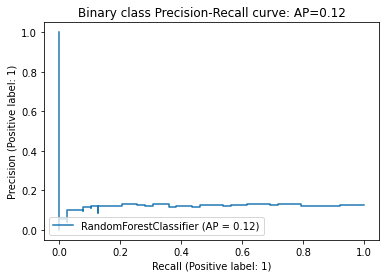

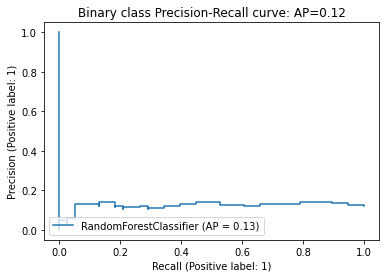

In [56]:
train_model(proteins, label, 2, 10,scaler=MinMaxScaler, minimumVariance=0.05)

In [18]:
def trainAllDataset(listaDataset, 
                    label, 
                    num_extenal_fold, 
                    mrmrK, 
                    scaler, 
                    minimumVariance, 
                    model_selection_grid,
                    scoring):
    roc_aucList =[]
    for dataset in listaDataset:
        roc_aucList.append(train_model(dataset, label, num_extenal_fold, mrmrK, scaler, minimumVariance, 
                          model_selection_grid,
                          scoring ))
    return np.mean(roc_aucList)

In [18]:
model_selection_grid_DT = [
    {},
    #{'criterion': ['gini', 'entropy'],
     #'max_leaf_nodes': [None, 2, 5, 10, 50, 100],
      #                  'max_features': [None, 'sqrt', 'log2'],
       #                 'max_depth': [None, 2, 5, 10]}
]

In [56]:
def addResultJsonFile(result_dict, column_name, file_name, dataset, features_mrmr):
    
    if column_name not in result_dict:
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                if column_name in saved_dict:
                    result_dict[column_name] = saved_dict[column_name]
                else:
                    result_dict[column_name] = train_model(dataset,
                                                           label, 
                                                            10, 
                                                            features_mrmr, 
                                                            MinMaxScaler, 
                                                            0.10, 
                                                            model_selection_grid_DT, 
                                                            'roc_auc')
                    with open(file_name, 'w', encoding='utf-8') as fp:
                        json.dump(result_dict, fp, ensure_ascii=False, indent=4)
        else:
            result_dict[column_name] = train_model(dataset,
                                                           label, 
                                                            10, 
                                                            features_mrmr, 
                                                            MinMaxScaler, 
                                                            0.10, 
                                                            model_selection_grid_DT, 
                                                            'roc_auc')
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict, fp, ensure_ascii=False, indent=4)

In [74]:
proteins_dict = {}
cvn_dict = {}
miRNA_dict = {}
mRNA_dict = {}

datasets_dict = [proteins_dict, cvn_dict, miRNA_dict, mRNA_dict]
columns_name = ['1_feature', '5_feature']
names_file = ['protein.json', 'cvn.json', 'miRNA.json', 'mRNA.json']
dataset_list = [cnv, miRNA, mRNA, proteins]
features_mrmr = [1,5]

In [77]:
def create_all_json(datasets_dict, columns_name, names_file, dataset_list, features_mrmr):
    for (dataset_dict, name_file, dataset) in zip(datasets_dict, names_file, dataset_list):
        print(f'start {dataset_dict}')
        for (column_name, feature_mrmr) in zip(columns_name, features_mrmr):
            print(f'start {column_name} using : {feature_mrmr} feature')
            addResultJsonFile( dataset_dict, column_name, name_file, dataset, feature_mrmr)

In [78]:
create_all_json(datasets_dict, columns_name, names_file, dataset_list, features_mrmr)

start 1_feature using : 1 feature


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.04it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.58it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.61it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.03it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.24it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.19it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.87it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.03it/s]


auc: 0.887 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.32it/s]


auc: 0.887 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.49it/s]


auc: 0.871 using params {}:
start 5_feature using : 5 feature


100%|████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.65s/it]


auc: 0.857 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.70s/it]


auc: 0.841 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.40s/it]


auc: 0.825 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.38s/it]


auc: 0.841 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.31s/it]


auc: 0.810 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.26s/it]


auc: 0.857 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.41s/it]


auc: 0.889 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.68s/it]


auc: 0.871 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.52s/it]


auc: 0.855 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:24<00:00,  4.93s/it]


auc: 0.839 using params {}:
start 1_feature using : 1 feature


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 174.35it/s]


auc: 0.841 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 145.19it/s]


auc: 0.857 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 266.07it/s]


auc: 0.873 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 204.57it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 57.95it/s]


auc: 0.873 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 207.99it/s]


auc: 0.762 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 220.44it/s]


auc: 0.873 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 222.91it/s]


auc: 0.887 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 155.55it/s]


auc: 0.887 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 221.66it/s]


auc: 0.887 using params {}:
start 5_feature using : 5 feature


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.72it/s]


auc: 0.857 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.85it/s]


auc: 0.762 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.60it/s]


auc: 0.857 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.16it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.28it/s]


auc: 0.857 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.82it/s]


auc: 0.794 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.68it/s]


auc: 0.778 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.08it/s]


auc: 0.806 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.44it/s]


auc: 0.855 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.53it/s]


auc: 0.839 using params {}:
start 1_feature using : 1 feature


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.22it/s]


auc: 0.825 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.66it/s]


auc: 0.746 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.50it/s]


auc: 0.825 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.41it/s]


auc: 0.857 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.47it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.76it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.20it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.85it/s]


auc: 0.903 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.85it/s]


auc: 0.887 using params {}:


100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.80it/s]


auc: 0.887 using params {}:
start 5_feature using : 5 feature


100%|████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


auc: 0.841 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


auc: 0.841 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.53s/it]


auc: 0.857 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.60s/it]


auc: 0.825 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.61s/it]


auc: 0.825 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.99s/it]


auc: 0.857 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.71s/it]


auc: 0.857 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.88s/it]


auc: 0.839 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.18s/it]


auc: 0.855 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.75s/it]


auc: 0.855 using params {}:
start 1_feature using : 1 feature


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 225.10it/s]


auc: 0.730 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 472.81it/s]


auc: 0.810 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 234.73it/s]


auc: 0.794 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 233.17it/s]


auc: 0.873 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 235.62it/s]


auc: 0.762 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 330.96it/s]


auc: 0.778 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 317.73it/s]


auc: 0.825 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 408.92it/s]


auc: 0.758 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 276.21it/s]


auc: 0.790 using params {}:


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 292.84it/s]


auc: 0.694 using params {}:
start 5_feature using : 5 feature


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.90it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.24it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.50it/s]


auc: 0.841 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 15.25it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.26it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.71it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 14.30it/s]


auc: 0.873 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.92it/s]


auc: 0.871 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.37it/s]


auc: 0.790 using params {}:


100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.16it/s]


auc: 0.887 using params {}:
